In [1]:
import pandas as pd

# Load each year's CSV
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\processed\yeosu_daily_weather_all_years.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         7183 non-null   int64  
 1   Average Temperature (°C)    7139 non-null   float64
 2   Maximum Temperature (°C)    7139 non-null   float64
 3   Minimum Temperature (°C)    7139 non-null   float64
 4   Atmospheric Pressure (hPa)  7139 non-null   float64
 5   Relative Humidity (%)       7129 non-null   float64
 6   Precipitation (mm)          6404 non-null   float64
 7   Visibility (km)             7138 non-null   float64
 8   Wind Speed (km/h)           7139 non-null   float64
 9   Max Sustained Wind (km/h)   7139 non-null   float64
 10  Month                       7183 non-null   int64  
 11  Year                        7183 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 673.5 KB


In [3]:
df.head()

,Day,Average Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Atmospheric Pressure (hPa),Relative Humidity (%),Precipitation (mm),Visibility (km),Wind Speed (km/h),Max Sustained Wind (km/h),Month,Year
0,1,5.3,8.1,1.2,1021.9,60.0,0.0,12.2,11.3,20.6,1,2006
1,2,4.0,7.5,0.9,1020.5,47.0,0.0,10.0,28.3,46.5,1,2006
2,3,2.6,6.9,0.8,1023.7,24.0,0.0,19.8,21.3,31.3,1,2006
3,4,-0.7,2.0,-4.7,1024.1,24.0,0.0,18.5,27.2,42.4,1,2006
4,5,-2.7,0.7,-5.5,1024.7,31.0,0.0,18.0,25.9,37.0,1,2006


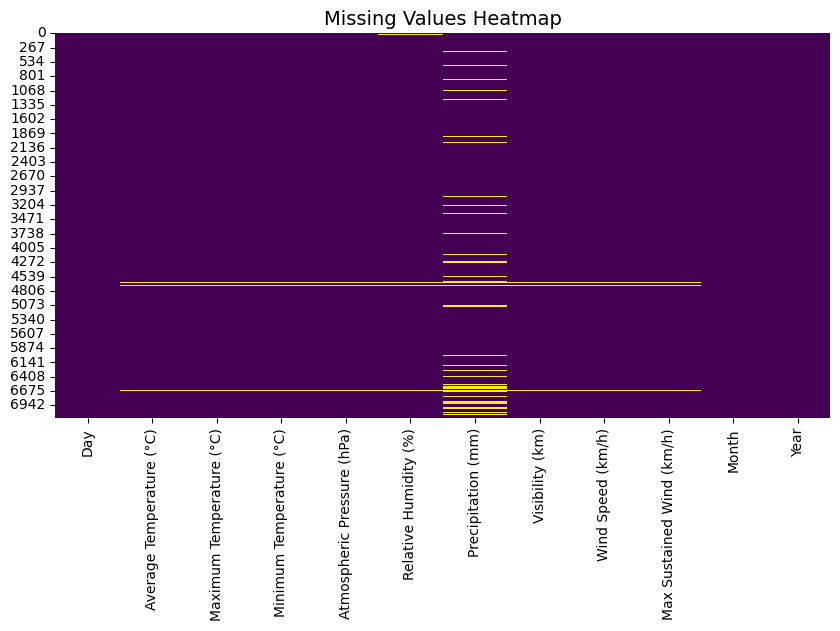

Missing value ratio per column:
Precipitation (mm)            0.108451
Relative Humidity (%)         0.007518
Visibility (km)               0.006265
Average Temperature (°C)      0.006126
Wind Speed (km/h)             0.006126
Minimum Temperature (°C)      0.006126
Maximum Temperature (°C)      0.006126
Atmospheric Pressure (hPa)    0.006126
Max Sustained Wind (km/h)     0.006126
Day                           0.000000
Month                         0.000000
Year                          0.000000
dtype: float64


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap of missing values
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

# Missing ratio per column
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("Missing value ratio per column:")
print(missing_ratio)


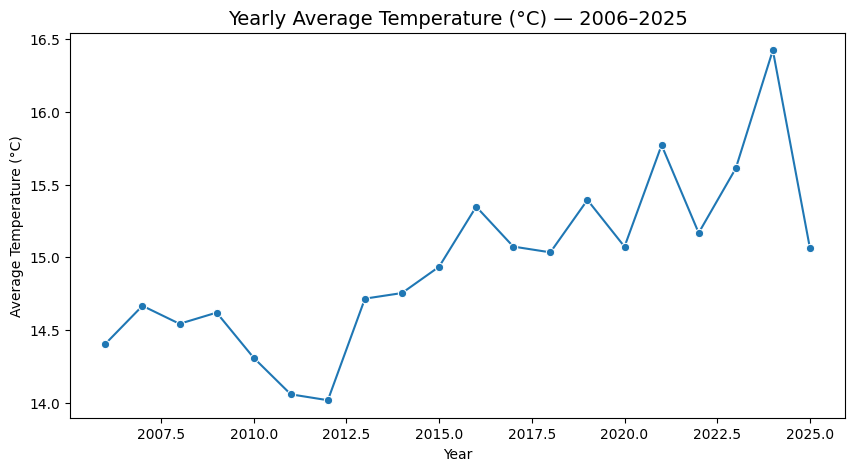

C:\Users\sharg\AppData\Local\Temp\ipykernel_14880\3873169423.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=yearly, x="Year", y="Precipitation (mm)", palette="Blues")


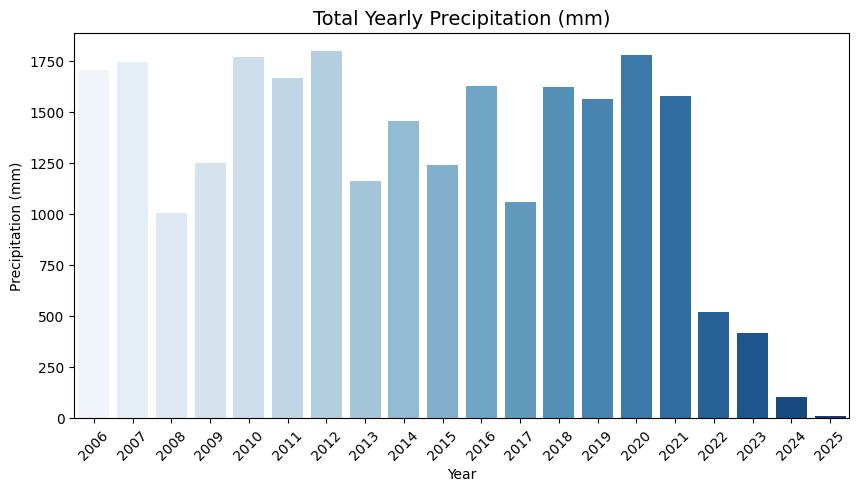

In [5]:
# Yearly aggregation
yearly = df.groupby("Year").agg({
    "Average Temperature (°C)": "mean",
    "Precipitation (mm)": "sum",
    "Relative Humidity (%)": "mean",
    "Wind Speed (km/h)": "mean"
}).reset_index()

# Temperature trend
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly, x="Year", y="Average Temperature (°C)", marker="o")
plt.title("Yearly Average Temperature (°C) — 2006–2025", fontsize=14)
plt.show()

# Precipitation trend
plt.figure(figsize=(10,5))
sns.barplot(data=yearly, x="Year", y="Precipitation (mm)", palette="Blues")
plt.title("Total Yearly Precipitation (mm)", fontsize=14)
plt.xticks(rotation=45)
plt.show()


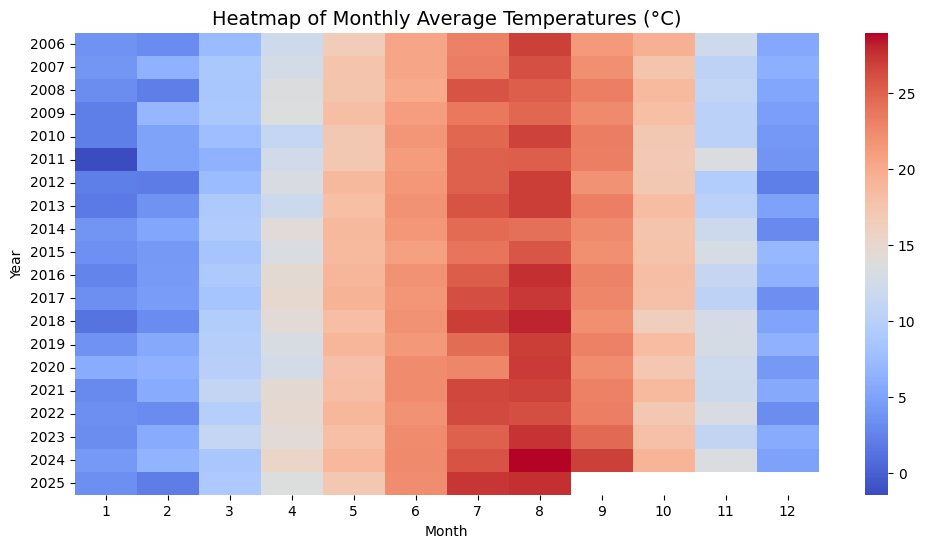

In [6]:
# Monthly average temperatures across years
pivot = df.pivot_table(values="Average Temperature (°C)", index="Year", columns="Month", aggfunc="mean")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="coolwarm", annot=False)
plt.title("Heatmap of Monthly Average Temperatures (°C)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


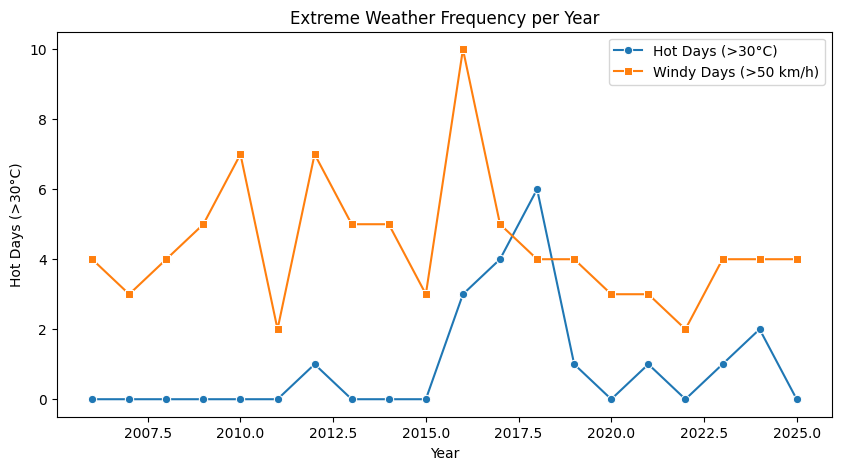

In [7]:
# Define extreme thresholds
heat_threshold = 30
wind_threshold = 50

# Count extreme events per year
extremes = df.groupby("Year").agg({
    "Average Temperature (°C)": lambda x: (x > heat_threshold).sum(),
    "Max Sustained Wind (km/h)": lambda x: (x > wind_threshold).sum()
}).rename(columns={
    "Average Temperature (°C)": "Hot Days (>30°C)",
    "Max Sustained Wind (km/h)": "Windy Days (>50 km/h)"
}).reset_index()

# Plot extreme weather events
plt.figure(figsize=(10,5))
sns.lineplot(data=extremes, x="Year", y="Hot Days (>30°C)", marker="o", label="Hot Days (>30°C)")
sns.lineplot(data=extremes, x="Year", y="Windy Days (>50 km/h)", marker="s", label="Windy Days (>50 km/h)")
plt.title("Extreme Weather Frequency per Year")
plt.legend()
plt.show()


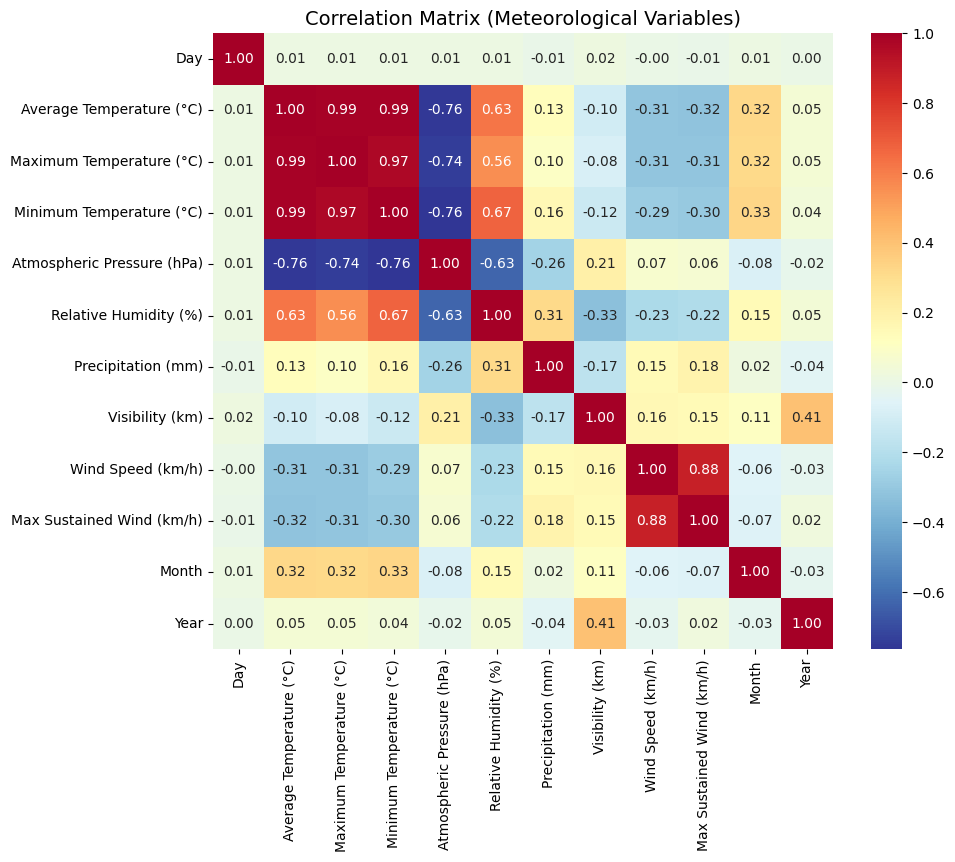

In [8]:
# Numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdYlBu_r")
plt.title("Correlation Matrix (Meteorological Variables)", fontsize=14)
plt.show()
